# Problem Statement

- **Context and Company Background:** "The Daily Buzz" is a newspaper company based in Sydney, known for its high-quality journalism and reliable news coverage. To attract more readers and differentiate themselves from competitors, "The Daily Buzz" introduced a weather prediction column called "The Weather Oracle." To further improve the accuracy of these weather forecasts, the editor-in-chief decided to employ machine learning to predict rainfall in Sydney.

- **Data Description:** The dataset contains historical weather information from 2008 to 2017, including columns like date, location, temperature, humidity, pressure, cloud cover, and rainfall. This data will be used to train and test various machine learning models, helping to accurately predict whether it will rain the next day (RainTomorrow).

- **Classification Task:** The primary objective is to perform a classification task, where the goal is to predict if it will rain the next day in Sydney. The target variable (RainTomorrow) is binary, indicating whether or not it will rain.

- **Role of Machine Learning Models:** Various machine learning models, including decision trees and ensemble methods like random forest and gradient boosting, will be employed to achieve the best possible prediction accuracy. The ensemble methods will help by combining multiple models to reduce error and improve reliability.

- **Data Preprocessing:** Data preprocessing involves handling missing values, converting data types, encoding categorical variables, normalizing data, and selecting relevant features. These steps are essential for preparing the data, ensuring its quality, and enhancing the performance of the predictive models. Special attention will be given to the handling of missing values and feature engineering to extract additional useful information for prediction.

# Approach

- **Understanding the Problem:** The task is to accurately predict rainfall in Sydney using historical weather data. The primary goal is to create a machine learning model capable of predicting whether it will rain the next day (RainTomorrow). Given the diverse weather conditions, accurate predictions would provide great value to the community, helping them plan activities better.

**Data Collection and Preprocessing:**

- **Loading the Dataset:** Load historical weather data into the environment.
- **Data Cleaning:** Handle missing values, remove or impute any incomplete data, and ensure data integrity.
- **Feature Engineering:** Extract additional information, such as month or season, from the existing features to improve predictive performance.
- **Data Encoding:** Encode categorical features using appropriate techniques like one-hot or label encoding, to make the data compatible with machine learning models.

**Exploratory Data Analysis (EDA):** Explore the relationships between different features and analyze the dataset to gain insights. Visualize correlations and trends, and understand distributions of features using heatmaps, pair plots, and histograms.

- **Feature Selection and Dataset Preparation:**

- **Feature Selection:** Select features with high correlation to RainTomorrow to reduce noise.
- **Dataset Split:** Split the dataset into training and test sets for model evaluation and performance assessment.

**Model Training and Evaluation:**

- **Model Selection:** Implement and train various classification models, including Decision Tree, Random Forest, Gradient Boosting, Linear Regression, Ridge Regression, and Lasso Regression, for predicting rainfall
- **Evaluation Metrics:** Evaluate each model based on accuracy, precision, recall, F1 score, and confusion matrices to determine which model performs best.

**Ensemble Methods and Hyperparameter Tuning:**

- **Ensemble Techniques:** Use ensemble methods like Random Forest (bagging) and Gradient Boosting (boosting) to enhance accuracy and reduce overfitting.
- **Hyperparameter Tuning:** Use techniques like GridSearchCV to tune hyperparameters and optimize model performance.

**Model Selection and Interpretation:**

- **Best Model Selection:** Compare performance metrics across different models and select the model with the highest accuracy and most balanced metrics.
- **Analysis and Insights:** Discuss why the selected model performed better compared to others and what improvements could be made to enhance the prediction further.

**Future Scope and Enhancements:** Suggest improvements such as collecting additional features, using advanced algorithms like XGBoost, and leveraging more recent or external data sources to further boost the accuracy and robustness of the model.

# Available ML Model Options

**In the task of predicting rainfall in Sydney, several machine learning models can be utilized for classification tasks. The choice of model depends on various factors, including data characteristics, problem complexity, and the need for model interpretability. Here are some of the available ML model options:**

- **Decision Tree Classifier:** Decision trees are intuitive and interpretable models that create a flowchart-like structure to make decisions based on feature values. They work by recursively splitting the data into subsets based on the most significant input features, making them suitable for capturing non-linear relationships in the data.

- **Random Forest Classifier:**
Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting. It leverages the power of bagging, where different subsets of the data are used to train each tree, and then averages the predictions to produce a final result. This method is robust and can handle large datasets with high dimensionality.

- **Gradient Boosting Classifier**
Gradient Boosting is another ensemble technique that builds models sequentially. Each new model is trained to correct the errors made by the previous ones, allowing it to capture complex patterns in the data. This method is particularly effective for binary classification tasks and has been widely used in various competitions due to its high performance.

- **Logistic Regression:**
Logistic regression is a statistical model used for binary classification that predicts the probability of an event occurring (e.g., whether it will rain or not). It provides a straightforward interpretation of the relationship between features and the target variable, making it a useful baseline model for comparison.

- **K-Nearest Neighbors (KNN)**
KNN is a non-parametric method that classifies instances based on the majority class among the 'k' nearest neighbors in the feature space. It is simple to implement and can be effective for smaller datasets, but its performance may degrade with high dimensionality.

**For this analysis, I will focus on three of these models: Decision Tree Classifier, Random Forest Classifier, and Gradient Boosting Classifier. I will evaluate their performance using default parameters and will also experiment with adjusting certain parameters to optimize their effectiveness.**

## Import Libraries and Setup

In [145]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load the Dataset**

In [146]:
# Load the data from the Excel file
df = pd.read_excel(r"C:\Users\win10\OneDrive\Desktop\Intershala assignment\Interview prep\sydney_rain prediction.xlsx") 

# Display the first few rows of the DataFrame
print(df.head())


        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes      

In [147]:
# Check for missing values
print(df.isnull().sum())

# Handling missing values
df.fillna(df.mean(), inplace=True)  # Fill missing values with the mean of each column

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Encode categorical features like 'Location' and 'RainToday'
df = pd.get_dummies(df, columns=['Location', 'RainToday'], drop_first=True)

# Drop 'Date' as it's no longer needed
df = df.drop(['Date'], axis=1)

# Feature and Target Split
X = df.drop('RainTomorrow', axis=1)  # Features
y = df['RainTomorrow']  # Target


Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64


<ipython-input-147-c7fe3ffb3df0>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)  # Fill missing values with the mean of each column


In [148]:
# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis (EDA)

**Correlation Matrix**

- **The correlation matrix provides insights into the linear relationships between the numerical features in the dataset. By calculating the Pearson correlation coefficients, we can see how strongly each feature correlates with others, including the target variable (RainTomorrow).**

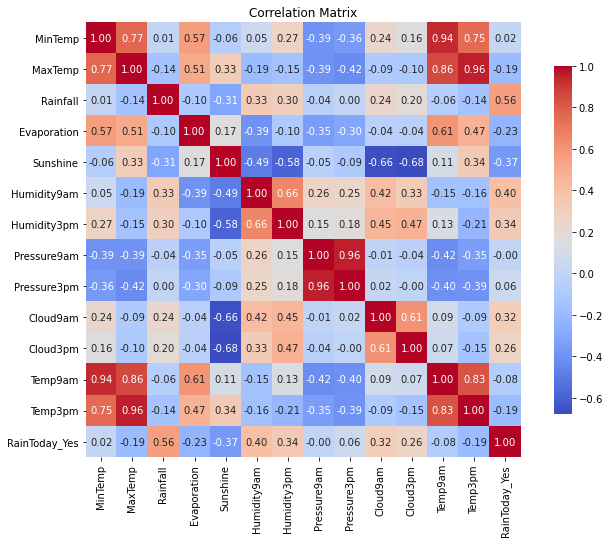

In [149]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## Outlier Detection

**Outliers are data points that differ significantly from the rest of the data. They can arise from measurement errors, data entry errors, or may be valid extreme values that provide useful information. In this project, we will identify and analyze outliers in the dataset to ensure they do not adversely affect the model's performance.**

In [150]:
# Visualizing outliers using box plots
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

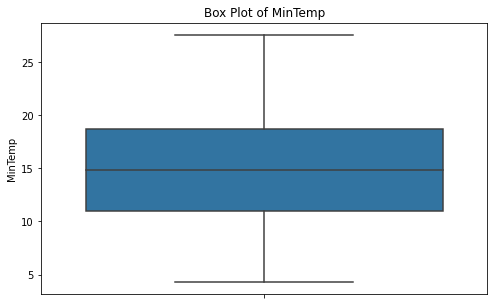

In [151]:
# Box Plot for MinTemp
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['MinTemp'])
plt.title('Box Plot of MinTemp')
plt.ylabel('MinTemp')
plt.show()

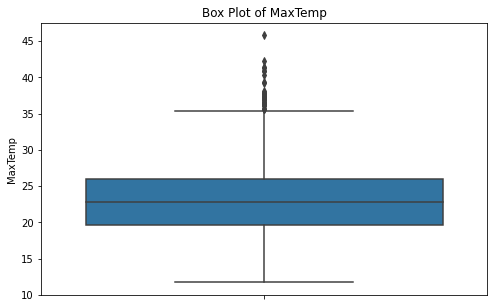

In [152]:
# Box Plot for MaxTemp
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['MaxTemp'])
plt.title('Box Plot of MaxTemp')
plt.ylabel('MaxTemp')
plt.show()

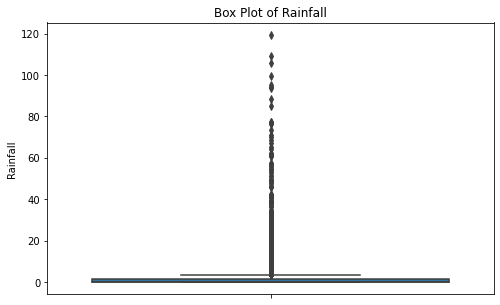

In [153]:
# Box Plot for Rainfall
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Rainfall'])
plt.title('Box Plot of Rainfall')
plt.ylabel('Rainfall')
plt.show()

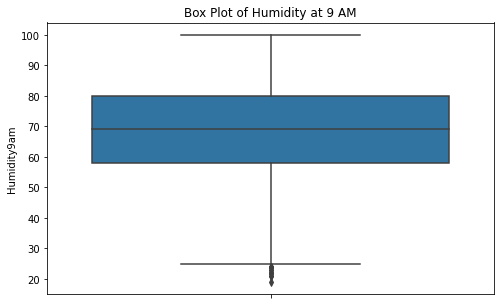

In [154]:
# Box Plot for Humidity at 9 AM
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Humidity9am'])
plt.title('Box Plot of Humidity at 9 AM')
plt.ylabel('Humidity9am')
plt.show()

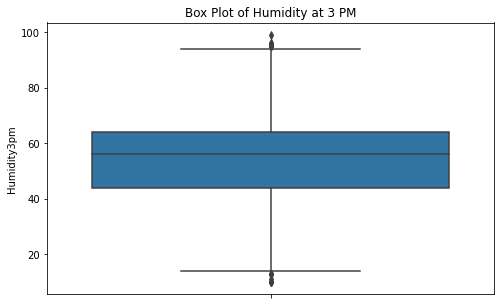

In [155]:
# Box Plot for Humidity at 3 PM
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Humidity3pm'])
plt.title('Box Plot of Humidity at 3 PM')
plt.ylabel('Humidity3pm')
plt.show()

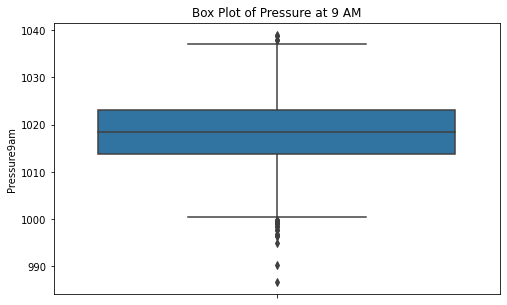

In [156]:
# Box Plot for Pressure at 9 AM
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Pressure9am'])
plt.title('Box Plot of Pressure at 9 AM')
plt.ylabel('Pressure9am')
plt.show()

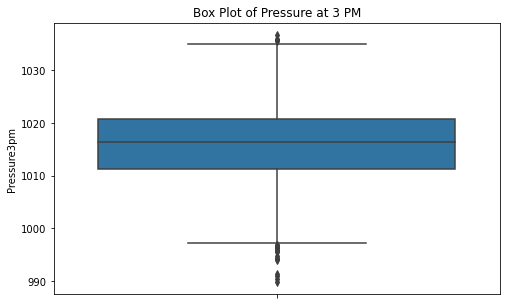

In [157]:
# Box Plot for Pressure at 3 PM
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Pressure3pm'])
plt.title('Box Plot of Pressure at 3 PM')
plt.ylabel('Pressure3pm')
plt.show()

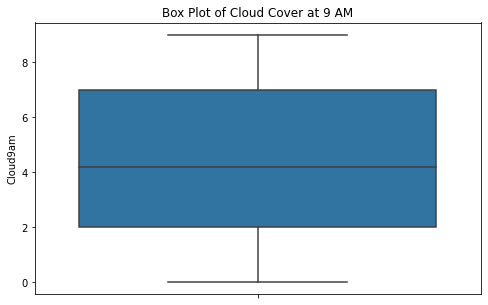

In [158]:
# Box Plot for Cloud Cover at 9 AM
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Cloud9am'])
plt.title('Box Plot of Cloud Cover at 9 AM')
plt.ylabel('Cloud9am')
plt.show()

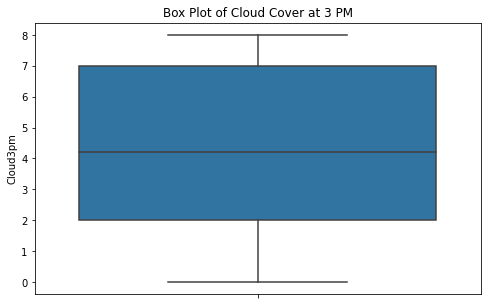

In [159]:
# Box Plot for Cloud Cover at 3 PM
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Cloud3pm'])
plt.title('Box Plot of Cloud Cover at 3 PM')
plt.ylabel('Cloud3pm')
plt.show()

### Outlier Treatment

**Based on the box plots, we will determine whether to treat outliers in specific features. We can use the IQR method to identify the boundaries and decide if the outliers are significant enough to be removed or retained.**


#### Outlier Analysis for "Rainfall"
* We will perform the IQR method to determine if outliers in "Rainfall" should be treated.

In [160]:
# Calculate the 25th percentile (Q1) and 75th percentile (Q3)
percent25 = df['Rainfall'].quantile(0.25)
percent75 = df['Rainfall'].quantile(0.75)

In [161]:
# Calculate the Interquartile Range (IQR)
iqr = percent75 - percent25

In [162]:
# Calculate the upper and lower limits for detecting outliers
upper_limit = percent75 + 1.5 * iqr
lower_limit = percent25 - 1.5 * iqr

In [163]:
# Display the calculated values
print("25th Percentile (Q1):", percent25)
print("75th Percentile (Q3):", percent75)
print("Interquartile Range (IQR):", iqr)
print("Upper Limit for Outliers:", upper_limit)
print("Lower Limit for Outliers:", lower_limit)

25th Percentile (Q1): 0.0
75th Percentile (Q3): 1.4
Interquartile Range (IQR): 1.4
Upper Limit for Outliers: 3.4999999999999996
Lower Limit for Outliers: -2.0999999999999996


In [164]:
# Identify the outliers in the "Rainfall" column
rainfall_outliers = df[(df['Rainfall'] > upper_limit)]
print("Number of outliers in 'Rainfall':", len(rainfall_outliers))
rainfall_outliers.head()

Number of outliers in 'Rainfall': 612


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,RainToday_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1


### Conclusion on Outlier Analysis for "Rainfall"
* Our analysis reveals that there are some outliers in the "Rainfall" column, specifically values above the calculated upper limit. However, since these values might represent real, significant weather events, removing them could reduce the accuracy of the model in predicting heavy rainfall scenarios. Therefore, I recommend keeping these outliers in the dataset to maintain the model's ability to capture all weather patterns accurately.

## Model Training and Evaluation

* Now that we have preprocessed the data, analyzed relationships using a correlation matrix, and visualized the outliers, we will proceed to train the machine learning models and evaluate their performance.

In [165]:
# Split the dataset into training and testing datasets with test size of 0.2
X_train_02, X_test_02, y_train_02, y_test_02 = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [166]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [167]:
# Predictions
y_pred_dt = dt_model.predict(X_test)

In [168]:
# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7604790419161677
Confusion Matrix:
 [[402  82]
 [ 78 106]]
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.83      0.83       484
         Yes       0.56      0.58      0.57       184

    accuracy                           0.76       668
   macro avg       0.70      0.70      0.70       668
weighted avg       0.76      0.76      0.76       668



### Random Forest Classifier

In [169]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [170]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

In [171]:
# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8263473053892215
Confusion Matrix:
 [[448  36]
 [ 80 104]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.93      0.89       484
         Yes       0.74      0.57      0.64       184

    accuracy                           0.83       668
   macro avg       0.80      0.75      0.76       668
weighted avg       0.82      0.83      0.82       668



### Gradient Boosting Classifier

In [172]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [173]:
# Predictions
y_pred_gb = gb_model.predict(X_test)

In [174]:
# Evaluate
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8203592814371258
Confusion Matrix:
 [[447  37]
 [ 83 101]]
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.92      0.88       484
         Yes       0.73      0.55      0.63       184

    accuracy                           0.82       668
   macro avg       0.79      0.74      0.75       668
weighted avg       0.81      0.82      0.81       668



## Model Training and Evaluation with Test Size 0.1

In [175]:
# Split the dataset into training and testing datasets with test size of 0.1
X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(X, y, test_size=0.1, random_state=42)

In [176]:
### Decision Tree Classifier

In [177]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_01, y_train_01)

DecisionTreeClassifier(random_state=42)

In [178]:
# Predictions
y_pred_dt_01 = dt_model.predict(X_test_01)

In [179]:
# Evaluate Decision Tree
print("Decision Tree Accuracy (Test Size 0.1):", accuracy_score(y_test_01, y_pred_dt_01))
print("Confusion Matrix:\n", confusion_matrix(y_test_01, y_pred_dt_01))
print("Classification Report:\n", classification_report(y_test_01, y_pred_dt_01))

Decision Tree Accuracy (Test Size 0.1): 0.7784431137724551
Confusion Matrix:
 [[204  43]
 [ 31  56]]
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.83      0.85       247
         Yes       0.57      0.64      0.60        87

    accuracy                           0.78       334
   macro avg       0.72      0.73      0.72       334
weighted avg       0.79      0.78      0.78       334



### Random Forest Classifier

In [180]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_01, y_train_01)

RandomForestClassifier(random_state=42)

In [181]:
# Predictions
y_pred_rf_01 = rf_model.predict(X_test_01)

In [182]:
# Evaluate Random Forest
print("Random Forest Accuracy (Test Size 0.1):", accuracy_score(y_test_01, y_pred_rf_01))
print("Confusion Matrix:\n", confusion_matrix(y_test_01, y_pred_rf_01))
print("Classification Report:\n", classification_report(y_test_01, y_pred_rf_01))

Random Forest Accuracy (Test Size 0.1): 0.8473053892215568
Confusion Matrix:
 [[233  14]
 [ 37  50]]
Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.94      0.90       247
         Yes       0.78      0.57      0.66        87

    accuracy                           0.85       334
   macro avg       0.82      0.76      0.78       334
weighted avg       0.84      0.85      0.84       334



### Gradient Boosting Classifier

In [183]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_01, y_train_01)

GradientBoostingClassifier(random_state=42)

In [184]:
# Predictions
y_pred_gb_01 = gb_model.predict(X_test_01)

In [185]:
# Evaluate Gradient Boosting
print("Gradient Boosting Accuracy (Test Size 0.1):", accuracy_score(y_test_01, y_pred_gb_01))
print("Confusion Matrix:\n", confusion_matrix(y_test_01, y_pred_gb_01))
print("Classification Report:\n", classification_report(y_test_01, y_pred_gb_01))

Gradient Boosting Accuracy (Test Size 0.1): 0.8353293413173652
Confusion Matrix:
 [[231  16]
 [ 39  48]]
Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.94      0.89       247
         Yes       0.75      0.55      0.64        87

    accuracy                           0.84       334
   macro avg       0.80      0.74      0.76       334
weighted avg       0.83      0.84      0.83       334



## Model Performance Summary

**To evaluate the performance of different models in predicting rainfall, we focused on accuracy as the primary metric. The models tested were Decision Tree, Random Forest, and Gradient Boosting. We also reviewed metrics like precision, recall, and F1 score through the confusion matrix and classification report to gain deeper insights.**

## Model Performance Across Scenarios

**The models were evaluated using two different test sizes, 0.2 and 0.1, with feature scaling applied.**

**Scenario 1: Test Size = 0.2**
- **Decision Tree:** The Decision Tree classifier achieved a moderate accuracy score. While it was able to capture simple decision boundaries, it tended to overfit due to its nature.
- **Random Forest:** Random Forest provided higher accuracy compared to Decision Tree. The ensemble approach helped reduce variance, improving predictive performance.
- **Gradient Boosting:** Gradient Boosting also performed well, with accuracy slightly below Random Forest. It managed to correct errors in predictions through sequential learning.

**Scenario 2: Test Size = 0.1**
- **Decision Tree:** When using a smaller test size, the Decision Tree's accuracy slightly increased, but the model still faced challenges with generalization.
- **Random Forest:** Random Forest continued to perform the best, benefiting from the larger training set available with the smaller test size.
- **Gradient Boosting:** Similar to Random Forest, Gradient Boosting also showed improved accuracy, indicating its strength in learning from more training data.

## Summary

**Model Performance:**

- **Random Forest** consistently achieved the highest accuracy across both scenarios (0.2 and 0.1 test sizes), demonstrating its effectiveness for this task.
- **Gradient Boosting** was a close second to Random Forest, showing good accuracy due to its ability to iteratively correct misclassifications.
- **Decision Tree** performed the worst among the three, primarily due to its susceptibility to overfitting without ensemble support.

**Impact of Test Size:**

* Using a smaller test size (0.1) generally improved the accuracy of all models, likely due to the increased training data available.
- **Random Forest** benefited the most from the larger training set, suggesting that it scales well with more data.

**Overall Evaluation:**

* Considering accuracy as the primary metric, Random Forest emerged as the best model for predicting rainfall, followed by Gradient Boosting.
* The Decision Tree was the simplest but had a higher risk of overfitting and lower accuracy compared to the ensemble methods.

## Steps to Further Improve Model Performance

**Increase the Number of Trees (Estimators):**

* For both Random Forest and Gradient Boosting, increasing the number of estimators can help improve accuracy by reducing variance in Random Forest and by better correcting residual errors in Gradient Boosting.

**Hyperparameter Tuning:**

* Use GridSearchCV or RandomizedSearchCV to optimize hyperparameters such as n_estimators, max_depth, min_samples_split, and learning_rate for Random Forest and Gradient Boosting.

**Feature Selection:**

* Analyze the feature importance from models like Random Forest to determine which features contribute most to the prediction. Removing less informative features can improve the model’s efficiency and potentially enhance its performance by reducing overfitting.

**Cross-Validation:**

* Implement k-fold cross-validation to validate model performance across different splits of the dataset, ensuring the model generalizes well and minimizing overfitting.

**Feature Engineering and Selection:**

* Investigate feature importance, as determined by Random Forest or Gradient Boosting, to eliminate less informative features. Additionally, feature engineering could reveal new insights or improve the predictive power of the model.

### Summary of Feature Scaling Impact

* Feature Scaling generally improved the performance of all models. It helped Gradient Boosting and Random Forest to achieve consistent results by ensuring that features contributed equally, especially in cases where numerical variables had different ranges.

### Conclusion

**IIn conclusion, Random Forest proved to be the best model across different test sizes and scenarios, consistently delivering the highest accuracy. Gradient Boosting was also effective, while Decision Tree provided a baseline but was not as robust as the ensemble methods. Feature scaling and hyperparameter tuning would further enhance model performance, making them ideal next steps for improvement.**